# Imports

In [221]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import sys
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Import Data

In [202]:
df = pd.read_sas('a2z_insurance.sas7bdat')

df.shape
df.info()
df.head()

(10296, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.00000,1985.00000,1982.00000,b'2 - High School',2177.00000,1.00000,1.00000,380.97000,0.39000,375.85000,79.45000,146.36000,47.01000,16.89000
1,2.00000,1981.00000,1995.00000,b'2 - High School',677.00000,4.00000,1.00000,-131.13000,1.12000,77.46000,416.20000,116.69000,194.48000,106.13000
2,3.00000,1991.00000,1970.00000,b'1 - Basic',2277.00000,3.00000,0.00000,504.67000,0.28000,206.15000,224.50000,124.58000,86.35000,99.02000
3,4.00000,1990.00000,1981.00000,b'3 - BSc/MSc',1099.00000,4.00000,1.00000,-16.99000,0.99000,182.48000,43.35000,311.17000,35.34000,28.34000
4,5.00000,1986.00000,1973.00000,b'3 - BSc/MSc',1763.00000,4.00000,1.00000,35.23000,0.90000,338.62000,47.80000,182.59000,18.78000,41.45000


In [101]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10296.00000,NaN,NaN,NaN,5148.50000,2972.34352,1.00000,2574.75000,5148.50000,7722.25000,10296.00000
FirstPolYear,10266.00000,NaN,NaN,NaN,1991.06263,511.26791,1974.00000,1980.00000,1986.00000,1992.00000,53784.00000
BirthYear,10279.00000,NaN,NaN,NaN,1968.00778,19.70948,1028.00000,1953.00000,1968.00000,1983.00000,2001.00000
EducDeg,10279,4,b'3 - BSc/MSc',4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10260.00000,NaN,NaN,NaN,2506.66706,1157.44963,333.00000,1706.00000,2501.50000,3290.25000,55215.00000
GeoLivArea,10295.00000,NaN,NaN,NaN,2.70986,1.26629,1.00000,1.00000,3.00000,4.00000,4.00000
Children,10275.00000,NaN,NaN,NaN,0.70676,0.45527,0.00000,0.00000,1.00000,1.00000,1.00000
CustMonVal,10296.00000,NaN,NaN,NaN,177.89260,1945.81151,-165680.42000,-9.44000,186.87000,399.77750,11875.89000
ClaimsRate,10296.00000,NaN,NaN,NaN,0.74277,2.91696,0.00000,0.39000,0.72000,0.98000,256.20000
PremMotor,10262.00000,NaN,NaN,NaN,300.47025,211.91500,-4.11000,190.59000,298.61000,408.30000,11604.42000


## Criação Variáveis

In [206]:
df['PremSum'] = df['PremMotor'] + df['PremHousehold'] + df['PremHealth'] + df['PremLife'] + df['PremWork']
df['Age'] = 2016 - df.BirthYear
df['YearsOfCustomer'] = 2016 - df.FirstPolYear

## Outliers

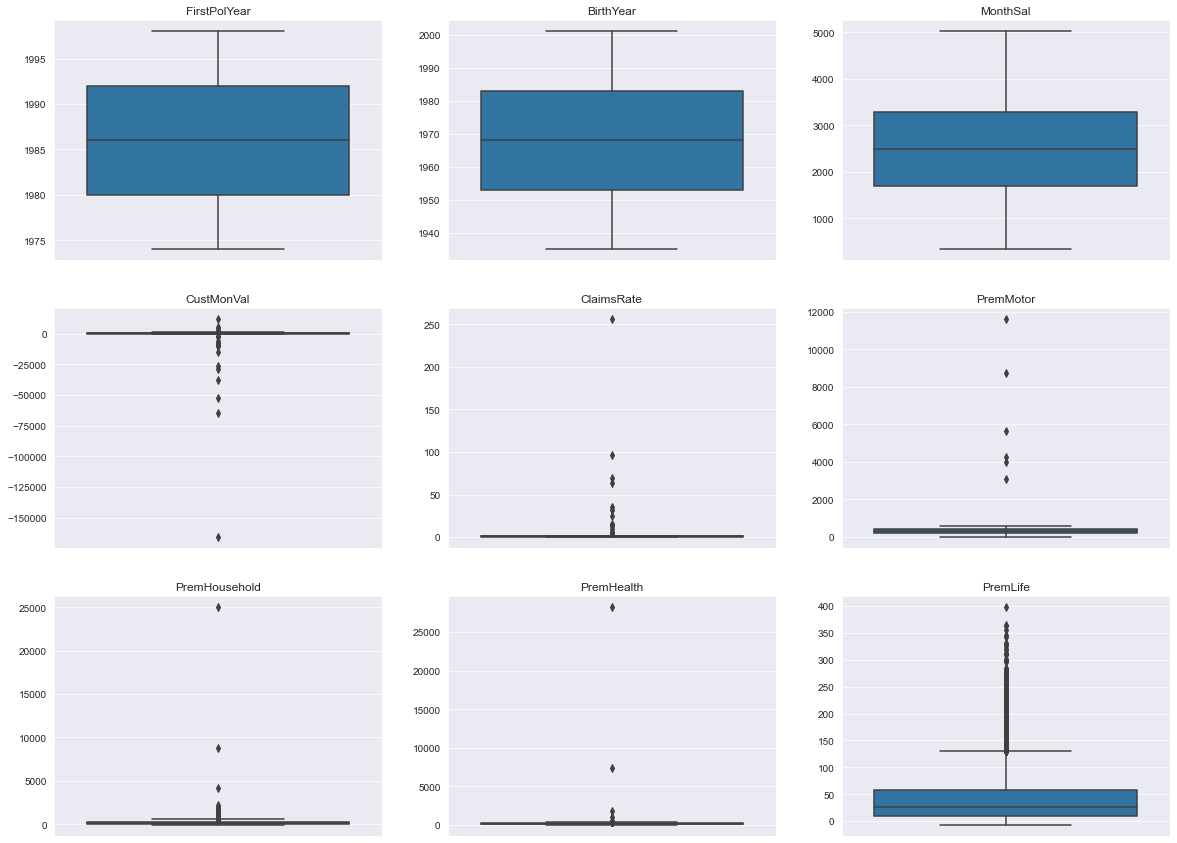

In [212]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

sns.boxplot(data=df, y='FirstPolYear', ax=axes[0][0]).set(ylabel=None);
sns.boxplot(data=df, y='BirthYear', ax=axes[0][1]).set(ylabel=None);
sns.boxplot(data=df, y='MonthSal', ax=axes[0][2]).set(ylabel=None);
sns.boxplot(data=df, y='CustMonVal', ax=axes[1][0]).set(ylabel=None);
sns.boxplot(data=df, y='ClaimsRate', ax=axes[1][1]).set(ylabel=None);
sns.boxplot(data=df, y='PremMotor', ax=axes[1][2]).set(ylabel=None);
sns.boxplot(data=df, y='PremHousehold', ax=axes[2][0]).set(ylabel=None);
sns.boxplot(data=df, y='PremHealth', ax=axes[2][1]).set(ylabel=None);
sns.boxplot(data=df, y='PremLife', ax=axes[2][2]).set(ylabel=None);

axes[0][0].set(title='FirstPolYear');
axes[0][1].set(title='BirthYear');
axes[0][2].set(title='MonthSal');
axes[1][0].set(title='CustMonVal');
axes[1][1].set(title='ClaimsRate');
axes[1][2].set(title='PremMotor');
axes[2][0].set(title='PremHousehold');
axes[2][1].set(title='PremHealth');
axes[2][2].set(title='PremLife');

plt.show();

<Figure size 1440x720 with 0 Axes>

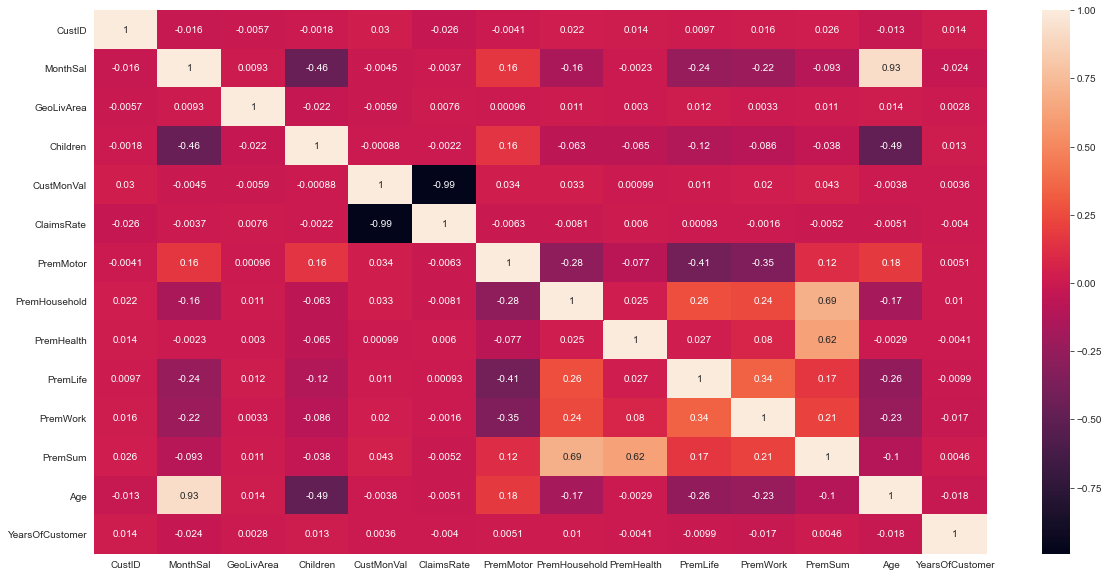

In [283]:
df_test_2 = df.drop(labels=['FirstPolYear', 'BirthYear'], axis=1)
plt.figure(figsize=(20, 10))

heatmap = sns.heatmap(df_test_2.corr(), annot=True)


In [284]:
df.CustMonVal.describe()

count     10214.00000
mean        177.83486
std        1953.50500
min     -165680.42000
25%          -9.44000
50%         187.20000
75%         399.83250
max       11875.89000
Name: CustMonVal, dtype: float64

In [261]:
df[df.CustMonVal < -10000]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,PremSum,Age,YearsOfCustomer
51,52.00000,1982.00000,1966.00000,b'3 - BSc/MSc',3234.00000,4.00000,1.00000,-14714.08000,25.36000,557.44000,20.00000,29.56000,5.00000,-9.00000,603.00000,50.00000,34.00000
135,136.00000,1997.00000,1988.00000,b'3 - BSc/MSc',2176.00000,4.00000,1.00000,-10198.91000,14.80000,297.61000,162.80000,143.36000,136.47000,-3.00000,737.24000,28.00000,19.00000
171,172.00000,1990.00000,1989.00000,b'3 - BSc/MSc',1086.00000,4.00000,1.00000,-165680.42000,256.20000,378.07000,78.90000,166.81000,6.89000,18.45000,649.12000,27.00000,26.00000
655,656.00000,1974.00000,1963.00000,b'3 - BSc/MSc',3279.00000,3.00000,1.00000,-64891.00000,96.00000,410.30000,117.25000,95.35000,37.34000,22.56000,682.80000,53.00000,42.00000
675,676.00000,1994.00000,1937.00000,b'2 - High School',4435.00000,1.00000,0.00000,-52382.76000,63.00000,197.48000,280.60000,276.94000,51.12000,38.34000,844.48000,79.00000,22.00000
707,708.00000,1991.00000,1991.00000,b'3 - BSc/MSc',1634.00000,1.00000,1.00000,-28945.40000,35.00000,175.70000,319.50000,294.39000,44.12000,16.89000,850.60000,25.00000,25.00000
758,759.00000,1988.00000,1992.00000,b'3 - BSc/MSc',1117.00000,1.00000,1.00000,-10107.37000,12.60000,193.37000,342.85000,276.94000,8.78000,47.23000,869.17000,24.00000,28.00000
917,918.00000,1986.00000,1952.00000,b'2 - High School',3355.00000,4.00000,0.00000,-26130.45000,32.30000,135.58000,290.05000,221.82000,86.46000,100.13000,834.04000,64.00000,30.00000
9648,9649.00000,1990.00000,1950.00000,b'3 - BSc/MSc',3574.00000,3.00000,0.00000,-37327.08000,69.00000,319.06000,-25.55000,245.38000,4.89000,4.78000,548.56000,66.00000,26.00000


In [262]:
df[df.ClaimsRate > 100]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,PremSum,Age,YearsOfCustomer
171,172.00000,1990.00000,1989.00000,b'3 - BSc/MSc',1086.00000,4.00000,1.00000,-165680.42000,256.20000,378.07000,78.90000,166.81000,6.89000,18.45000,649.12000,27.00000,26.00000


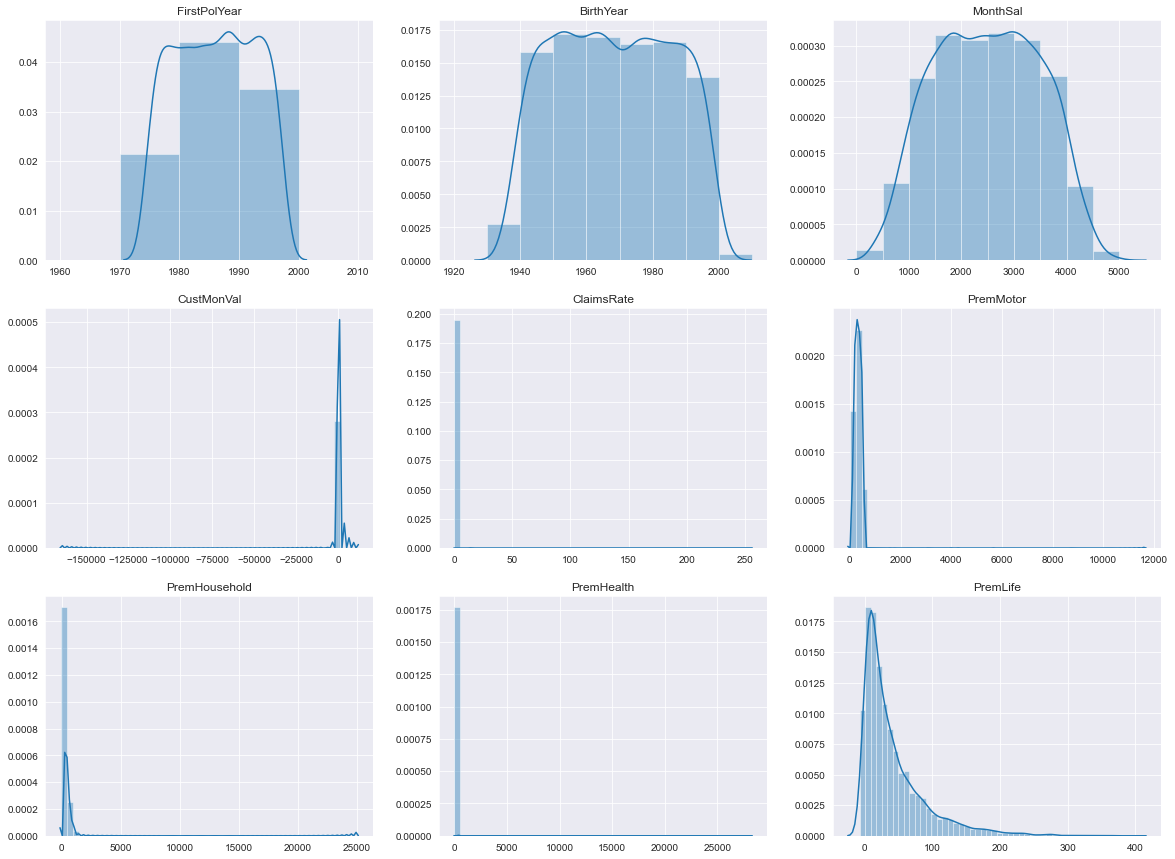

In [255]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))


sns.distplot(df["FirstPolYear"], bins=[1960, 1970, 1980, 1990, 2000, 2010], ax=axes[0][0]).set(xlabel=None);
sns.distplot(df["BirthYear"], bins=[1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], ax=axes[0][1]).set(xlabel=None);
sns.distplot(df["MonthSal"], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], ax=axes[0][2]).set(xlabel=None);
sns.distplot(df["CustMonVal"], ax=axes[1][0]).set(xlabel=None);
sns.distplot(df["ClaimsRate"], ax=axes[1][1]).set(xlabel=None);
sns.distplot(df["PremMotor"], ax=axes[1][2]).set(xlabel=None);
sns.distplot(df["PremHousehold"], ax=axes[2][0]).set(xlabel=None);
sns.distplot(df["PremHealth"], ax=axes[2][1]).set(xlabel=None);
sns.distplot(df["PremLife"], ax=axes[2][2]).set(xlabel=None);

axes[0][0].set(title='FirstPolYear');
axes[0][1].set(title='BirthYear');
axes[0][2].set(title='MonthSal');
axes[1][0].set(title='CustMonVal');
axes[1][1].set(title='ClaimsRate');
axes[1][2].set(title='PremMotor');
axes[2][0].set(title='PremHousehold');
axes[2][1].set(title='PremHealth');
axes[2][2].set(title='PremLife');

plt.show();

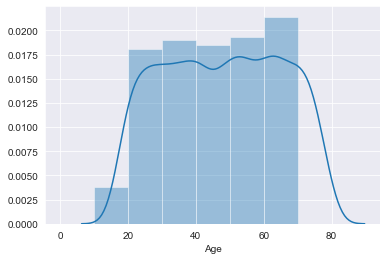

In [238]:
sns.set_style(style="darkgrid") 
sns.distplot(df["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70])

plt.show()

### Exploração

#### df_test.PremSum > df_test.MonthSal ---> 579

In [200]:
df_test['PremSum'] = df['PremMotor'] + df['PremHousehold'] + df['PremHealth'] + df['PremLife'] + df['PremWork']
df_test[df_test.PremSum > df_test.MonthSal] # 579

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,PremSum,Age,YearOfCustomers,YearsOfCustomer
1,2.00000,1981.00000,1995.00000,b'2 - High School',677.00000,4.00000,1.00000,-131.13000,1.12000,77.46000,416.20000,116.69000,194.48000,106.13000,910.96000,21.00000,35.00000,35.00000
108,109.00000,1991.00000,1995.00000,b'1 - Basic',764.00000,4.00000,1.00000,71.24000,0.93000,79.68000,912.95000,97.24000,213.04000,16.56000,1319.47000,21.00000,25.00000,25.00000
182,183.00000,1995.00000,1991.00000,b'2 - High School',826.00000,1.00000,0.00000,133.92000,0.86000,158.92000,634.00000,207.26000,73.57000,23.45000,1097.20000,25.00000,21.00000,21.00000
186,187.00000,1993.00000,1999.00000,b'1 - Basic',1247.00000,2.00000,1.00000,-128.24000,1.07000,33.23000,1026.30000,82.57000,75.68000,212.15000,1429.93000,17.00000,23.00000,23.00000
241,242.00000,1983.00000,1986.00000,b'2 - High School',642.00000,4.00000,1.00000,381.53000,0.49000,188.48000,273.95000,271.83000,26.45000,29.45000,790.16000,30.00000,33.00000,33.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10216,10217.00000,1986.00000,1996.00000,b'1 - Basic',970.00000,4.00000,1.00000,901.95000,0.36000,39.23000,1070.20000,96.24000,182.48000,63.01000,1451.16000,20.00000,30.00000,30.00000
10228,10229.00000,1978.00000,1996.00000,b'2 - High School',844.00000,3.00000,0.00000,1041.42000,0.25000,51.01000,1045.75000,247.27000,53.90000,20.67000,1418.60000,20.00000,38.00000,38.00000
10253,10254.00000,1985.00000,1995.00000,b'1 - Basic',952.00000,1.00000,1.00000,17.01000,0.96000,14.56000,637.35000,134.58000,128.47000,155.92000,1070.88000,21.00000,31.00000,31.00000
10267,10268.00000,1977.00000,1996.00000,b'1 - Basic',834.00000,4.00000,1.00000,254.72000,0.67000,181.48000,309.50000,134.58000,114.80000,98.24000,838.60000,20.00000,39.00000,39.00000


#### df.BirthYear > df.FirstPolYear ---> 1997

In [201]:
df[df.BirthYear > df.FirstPolYear]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,PremSum,Age,YearsOfCustomer
1,2.00000,1981.00000,1995.00000,b'2 - High School',677.00000,4.00000,1.00000,-131.13000,1.12000,77.46000,416.20000,116.69000,194.48000,106.13000,910.96000,21.00000,35.00000
13,14.00000,1983.00000,2000.00000,b'1 - Basic',1043.00000,3.00000,1.00000,-75.12000,1.06000,44.34000,342.85000,127.69000,267.94000,94.46000,877.28000,16.00000,33.00000
18,19.00000,1981.00000,1982.00000,b'1 - Basic',1414.00000,3.00000,1.00000,230.38000,0.71000,313.17000,373.40000,121.80000,14.78000,72.57000,895.72000,34.00000,35.00000
22,23.00000,1976.00000,1986.00000,b'2 - High School',1495.00000,1.00000,1.00000,-89.79000,1.08000,209.04000,308.95000,192.48000,64.79000,54.90000,830.16000,30.00000,40.00000
40,41.00000,1994.00000,1995.00000,b'2 - High School',1177.00000,4.00000,1.00000,121.36000,0.84000,52.01000,455.65000,135.47000,146.36000,148.03000,937.52000,21.00000,22.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,10269.00000,1987.00000,1988.00000,b'3 - BSc/MSc',1414.00000,3.00000,1.00000,50.46000,0.90000,129.58000,167.80000,184.48000,165.92000,75.46000,723.24000,28.00000,29.00000
10273,10274.00000,1989.00000,1992.00000,b'2 - High School',1035.00000,1.00000,1.00000,293.51000,0.58000,235.71000,195.60000,103.13000,170.92000,58.12000,763.48000,24.00000,27.00000
10284,10285.00000,1980.00000,1987.00000,b'3 - BSc/MSc',1504.00000,4.00000,1.00000,-1.55000,0.96000,390.63000,29.45000,179.70000,-6.00000,nan,nan,29.00000,36.00000
10288,10289.00000,1982.00000,1993.00000,b'2 - High School',1465.00000,1.00000,1.00000,795.15000,0.35000,67.79000,820.15000,102.13000,182.48000,86.46000,1259.01000,23.00000,34.00000


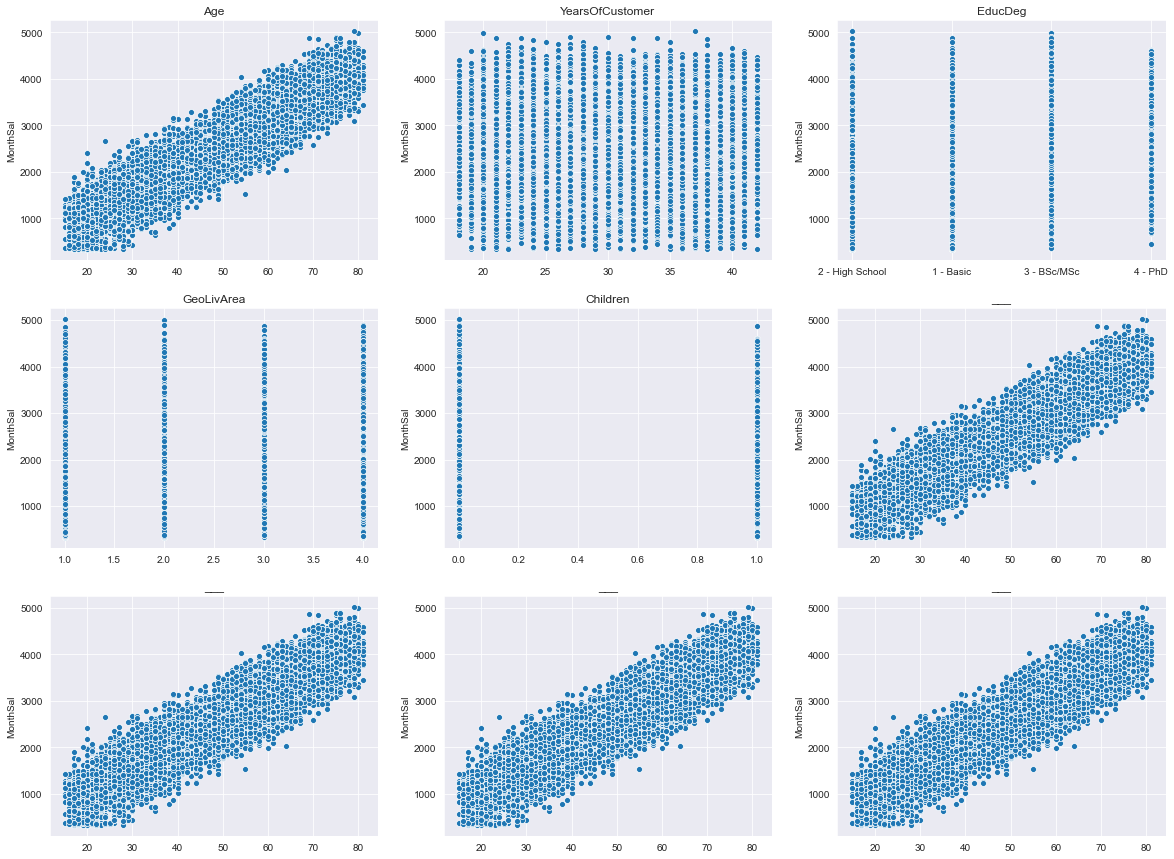

In [197]:
# correlacoes com MonthSal
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

sns.scatterplot(data=df, x="Age", y="MonthSal", ax=axes[0][0]).set(xlabel=None);
sns.scatterplot(data=df, x="YearsOfCustomer", y="MonthSal", ax=axes[0][1]).set(xlabel=None);
sns.scatterplot(data=df, x="EducDeg", y="MonthSal", ax=axes[0][2]).set(xlabel=None);
sns.scatterplot(data=df, x="GeoLivArea", y="MonthSal", ax=axes[1][0]).set(xlabel=None);
sns.scatterplot(data=df, x="Children", y="MonthSal", ax=axes[1][1]).set(xlabel=None);
sns.scatterplot(data=df, x="Age", y="MonthSal", ax=axes[1][2]).set(xlabel=None);
sns.scatterplot(data=df, x="Age", y="MonthSal", ax=axes[2][0]).set(xlabel=None);
sns.scatterplot(data=df, x="Age", y="MonthSal", ax=axes[2][1]).set(xlabel=None);
sns.scatterplot(data=df, x="Age", y="MonthSal", ax=axes[2][2]).set(xlabel=None);

axes[0][0].set(title='Age');
axes[0][1].set(title='YearsOfCustomer');
axes[0][2].set(title='EducDeg');
axes[1][0].set(title='GeoLivArea');
axes[1][1].set(title='Children');
axes[1][2].set(title='___');
axes[2][0].set(title='___');
axes[2][1].set(title='___');
axes[2][2].set(title='___');

plt.show();

In [254]:
df.MonthSal.describe()

count   10214.00000
mean     2497.59888
std       984.81256
min       333.00000
25%      1705.00000
50%      2500.00000
75%      3290.00000
max      5021.00000
Name: MonthSal, dtype: float64

In [253]:
df['MonthSal'].describe(percentiles=[0.0005,0.005,0.01,0.15,0.25,0.5,0.7,0.9, 0.95])
df[df.MonthSal > 20000]

count   10214.00000
mean     2497.59888
std       984.81256
min       333.00000
0.05%     335.00000
0.5%      427.06500
1%        557.52000
15%      1372.00000
25%      1705.00000
50%      2500.00000
70%      3129.00000
90%      3822.00000
95%      4045.00000
max      5021.00000
Name: MonthSal, dtype: float64

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,PremSum,Age,YearsOfCustomer


In [203]:
df['BirthYear'].describe(percentiles=[0.0005,0.005,0.01,0.15,0.25,0.5,0.7,0.9])
df[df.BirthYear < 1800]

count   10279.00000
mean     1968.00778
std        19.70948
min      1028.00000
0.05%    1935.00000
0.5%     1936.39000
1%       1937.00000
15%      1947.00000
25%      1953.00000
50%      1968.00000
70%      1980.00000
90%      1992.00000
max      2001.00000
Name: BirthYear, dtype: float64

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
7195,7196.00000,1993.00000,1028.00000,b'3 - BSc/MSc',2830.00000,4.00000,0.00000,146.02000,0.77000,428.97000,192.80000,108.91000,1.89000,23.67000


### Remoção outliers

In [209]:
df = df[df.FirstPolYear < 50000] # 1 
df = df[df.BirthYear > 1900]     # 1
df = df[df.MonthSal < 20000]     # 1

## Null values

In [163]:
df.isnull().sum()

CustID             0
FirstPolYear       0
BirthYear          0
EducDeg            2
MonthSal          34
GeoLivArea         0
Children          13
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          85
dtype: int64

## categorical variable

In [113]:
df['EducDeg'].unique()
pd.value_counts(df.EducDeg, dropna=False)

array([b'2 - High School', b'1 - Basic', b'3 - BSc/MSc', b'4 - PhD', nan],
      dtype=object)

b'3 - BSc/MSc'        4799
b'2 - High School'    3510
b'1 - Basic'          1272
b'4 - PhD'             698
NaN                     17
Name: EducDeg, dtype: int64

In [114]:
#Further analysis on monthSalary

df['MonthSal'].describe(percentiles=[0.0005,0.005,0.01,0.15,0.25,0.5,0.7,0.9])

count   10260.00000
mean     2506.66706
std      1157.44963
min       333.00000
0.05%     335.00000
0.5%      427.29500
1%        556.18000
15%      1372.85000
25%      1706.00000
50%      2501.50000
70%      3129.00000
90%      3823.00000
max     55215.00000
Name: MonthSal, dtype: float64

In [178]:
df_test2 = df[(df['MonthSal'] > 350) & (df['MonthSal'] < 30000) & (df['BirthYear'] > 1600) & (df['FirstPolYear'] < 2000)]

df_test2.shape

(10198, 14)

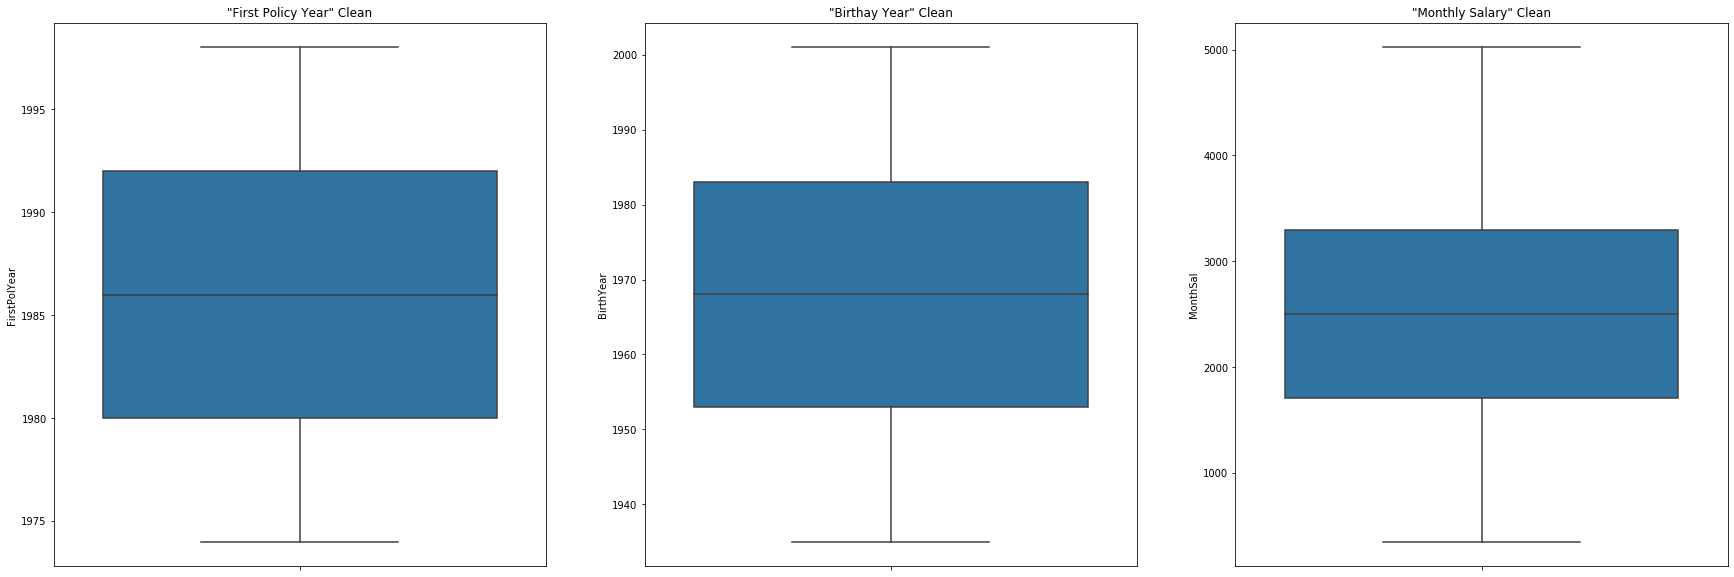

In [179]:
#Após observar erros e discrepancias nas colunas de BrithYear, FirstPolYear e MonthSal, foi removido de BirthYear  e FirstpolYear o que parecia erros de preenchimento e na coluna MonthSal foi removido dois clientes com um salário superior aos demais que podem ser tratados especialmente por nossa equipe de marketing e alguns clientes com um salário muito baixo que poderiam afetar nosso modelo (os clientes removidos não apresentavam anomalias no CustMonVal).

df_test = df[df['MonthSal'] > 350]
df_test = df_test[df_test['BirthYear'] > 1600]
df_test = df_test[df_test['MonthSal'] < 30000]
df_test = df_test[df_test['FirstPolYear'] < 2000]

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
sns.boxplot(y='FirstPolYear', data=df_test)
plt.title('"First Policy Year" Clean')

plt.subplot(1,3,2)
sns.boxplot(y='BirthYear', data=df_test)
plt.title('"Birthay Year" Clean')

plt.subplot(1,3,3)
sns.boxplot(y='MonthSal', data=df_test)
plt.title('"Monthly Salary" Clean')

plt.show()

In [180]:
#Porcentagem de valores em df_tes comparado com df
print(df_test2.shape[0] / df.shape[0])
print(df_test2.shape)
print(df.shape)

0.9904817404817405
(10198, 14)
(10296, 14)


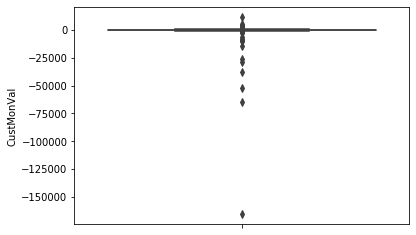

In [181]:
#Agora que já lidamos com as colunas menos sensíveis, vamos tentar identificar alguns outliers na coluna de CustMonVal. Lembrando que não devemos simplesmente limpar nossa basse, pois o modelo também deve ser capaz de agrupar tais clientes em caso que representem excesso de despesas ou qualquer outra situação

sns.boxplot(y='CustMonVal', data=df_test)

(10188, 14)


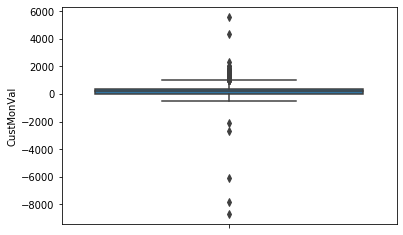

In [182]:
#A melhor forma de reduzir o numero de outliers sem danificar muito a base é por tirar aqueles que representam um CustMonVal menor que -10.000  

df_test2 = df_test2[df_test['CustMonVal'] > -10000]
df_test2 = df_test2[df_test['CustMonVal'] < 10000]


sns.boxplot(y='CustMonVal', data=df_test2)

print(df_test2.shape)

In [183]:
#Porcentagem de valores em df_tes comparado com df
print(df.shape[0] - df_test.shape[0])
print(df_test.shape[0] / df.shape[0])

98
0.9904817404817405


In [184]:
#Done dealing with outliers, we can build a excel file with them and send it sepparately to the marketing department to further analysis.

#CREATE OUTLIERS TABLE

<h3>Outliers Solution</h3>
<p>After analysing the data, we could exclude a total of 48 records that we identified as outliers. These records were grouped in a excel file that we could later send to the marketing department to be treated separately.</p>
<p>Our new table df_test contain 0.995% of the records from the original one.</p>

<h2>Dealing with NaN Values</h2>

In [185]:
#Deletando as rows que tem valores faltando para Children, EducDeg e GeoLivArea
cols = ['GeoLivArea','Children','EducDeg']
df_test = df.dropna(axis=0, how='any',subset=cols)

print(df_test.isna().sum())
print(df_test.shape)

CustID             0
FirstPolYear       7
BirthYear         17
EducDeg            0
MonthSal          35
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        42
PremLife         104
PremWork          85
dtype: int64
(10258, 14)


By dropping the NaN values in the columns ('GeoLivArea','Children','EducDeg') we will loose only 0,4% of our Data Base. It could be useful to use the model to cluster the other 97% and deal with the rest 

Support links:

http://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [186]:
df_test['MonthSal'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.999])

count    10223.000000
mean      2506.062213
std       1158.155554
min        333.000000
10%       1175.000000
25%       1705.000000
50%       2500.000000
75%       3290.000000
90%       3823.000000
99.9%     4866.336000
max      55215.000000
Name: MonthSal, dtype: float64

In [187]:
df_test['MonthSal'].mean()

2506.0622126577327

In [188]:
#Now, lets try to fill the other missing values with their means

#For salary and ages, we will use the means for each column, and for the First Policy Year, we will use the value just before to fill the 

mean = round(df_test['MonthSal'].mean())
print(mean)
df_test['MonthSal'].fillna(mean, inplace=True)

2506


In [189]:
df_test.isna().sum()

CustID             0
FirstPolYear       7
BirthYear         17
EducDeg            0
MonthSal           0
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        42
PremLife         104
PremWork          85
dtype: int64

In [190]:
#Finding the mean() of the BirthYear and rounding it
bDay_mean = round(df_test['BirthYear'].mean())
bDay_mean

1968

In [191]:
#Replacing bday year by the round of the bday year mean.
bDay_mean = round(df_test['BirthYear'].mean())
print(bDay_mean)
df_test['BirthYear'].fillna(bDay_mean, inplace=True)
print(df_test.isna().sum())

1968
CustID             0
FirstPolYear       7
BirthYear          0
EducDeg            0
MonthSal           0
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        42
PremLife         104
PremWork          85
dtype: int64


In [192]:
#Found an error for the First Policy Year -> Outlier
df_test2['FirstPolYear'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.995])

count    10188.000000
mean      1986.026600
std          6.609468
min       1974.000000
10%       1977.000000
25%       1980.000000
50%       1986.000000
75%       1992.000000
90%       1995.000000
99.5%     1998.000000
max       1998.000000
Name: FirstPolYear, dtype: float64